<a href="https://colab.research.google.com/github/sumeyyedemir5/nlp-preprocessing_and_textRepresentation/blob/main/LESK_and_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LESK algoritması**:

 Kelime Anlam Belirleme (Word Sense Disambiguation - WSD) problemini çözmek için kullanılan

In [ ]:
import nltk
from nltk.wsd import lesk

nltk.download("wordnet")
nltk.download("omw-1.4")
nltk.download("punkt")
nltk.download("punkt_tab") # Add this line to download the missing resource

sentence = "I went to bank to deposit money"
word1= "bank"
sense1= lesk(nltk.word_tokenize(sentence), word1)
print(sentence)
print(word1)
print(sense1.definition())
'''
I went to bank to deposit money
bank
BANK kelimesinin anlam belirsizliğini gidermek için kullandık.
a container (usually with a slot in the top) for keeping money at home
'''

In [ ]:
# Daha güçlü Lesk Algoritmaları
!pip install pywsd
import nltk
nltk.download('averaged_perceptron_tagger_eng') # Download the missing NLTK resource
nltk.download('wordnet') # Download the missing NLTK resource for pywsd
nltk.download('punkt_tab') # Add this line to download the missing resource
from pywsd.lesk import simple_lesk, adapted_lesk, cosine_lesk

sentences = [
    "I went to the bank to deposit money",
    "The river bank was flooded after the heavy rain"
]
word = "bank"
for sentence in sentences:
  print(sentence)
  sense_simple = simple_lesk(sentence,word)
  print("Sense simple: ",sense_simple.definition())
  sense_adapted = adapted_lesk(sentence,word)
  print("Sense adapted: ",sense_adapted.definition())
  sense_cosine = cosine_lesk(sentence,word)
  print("Sense cosine: ",sense_cosine.definition())

'''
I went to the bank to deposit money
Sense simple:  a financial institution that accepts deposits and channels the money into lending activities
Sense adapted:  a financial institution that accepts deposits and channels the money into lending activities
Sense cosine:  a container (usually with a slot in the top) for keeping money at home
The river bank was flooded after the heavy rain
Sense simple:  sloping land (especially the slope beside a body of water)
Sense adapted:  sloping land (especially the slope beside a body of water)
Sense cosine:  a supply or stock held in reserve for future use (especially in emergencies)
'''

## Duygu Analizi (Sentiment Analysis)

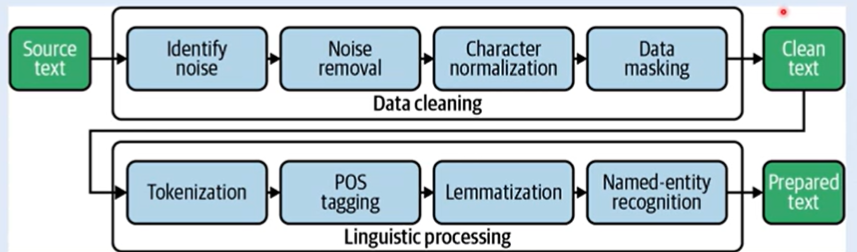

In [ ]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')
df = pd.read_csv('/content/drive/MyDrive/amazon.csv')

In [ ]:
def preprocess_text(text):
  tokens = word_tokenize(text.lower())
  stop_words = set(stopwords.words('english'))
  filtered_tokens = [token for token in tokens if token not in stop_words]
  lemmatizer = WordNetLemmatizer()
  lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

  processed_text = " ".join(lemmatized_tokens)
  return processed_text

df["reviewText2"] = df["reviewText"].apply(preprocess_text)
# [preprocess_text(text) for text in df["reviewText"]]



In [ ]:
analyzer = SentimentIntensityAnalyzer()
def get_sentiment(text):
  scores= analyzer.polarity_scores(text)
  sentiment = 1 if scores["pos"]> 0 else 0
  return sentiment

df["sentiment"] = df["reviewText2"].apply(get_sentiment)


In [ ]:
# evaluation - test
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(df["Positive"], df["sentiment"]))
print(classification_report(df["Positive"], df["sentiment"]))